In [4]:
import numpy as np
import joblib

In [5]:
data = np.load("data/sst2.npz")

In [6]:
x_train = data["x_train"]
y_train = data["y_train"]
x_val = data["x_val"]
y_val = data["y_val"]

In [9]:
import re
# import nltk
# nltk.download('stopwords')
# nltk.download('wordnet')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
from nltk.stem import PorterStemmer
st=PorterStemmer()
from textblob import TextBlob


def data_clean(x):
    x = x.lower()                                # 所有字母转为小写
    x = ' '.join([word for word in x.split(' ') if word not in stop_words])  # 删除停用词
    x = x.encode('ascii', 'ignore').decode()     # 删除无用 unicode 字符
    x = re.sub("@\S+", " ", x)                   # 删除提及@
    x = re.sub("https*\S+", " ", x)              # 删除URL链接
    x = re.sub("#\S+", " ", x)                   # 删除标签
    x = re.sub("\'\w+", '', x)                   # 删除缩略符
    x = re.sub(r'[’!"#$%&\'()*+,-./:;<=>?@，。?★、…【】《》？“”‘’！\[\\\]^_`{|}~]+', ' ', x)   # 删除特殊字符
    x = re.sub(r'\w*\d+\w*', '', x)              # 删除无用数字
    x = re.sub('\s{2,}', " ", x)                 # 删除2个及以上的空格
    x = x.strip()                                # 删除两端无用空格
    x = str(TextBlob(x).correct())               # 拼写校对，运行较慢，真正使用时注释掉
    return x


bad_case1 = "@djk022 The movie is such a shit💩💩💩💩💩韈💩"  # 提及，表情符号，中文乱码，停用词is a such the
good_case1 = data_clean(bad_case1)
print(good_case1)
bad_case2 = "#Mermaid #Disney We love the movie and but there are so many anti-fans giving low scores(6.0) in https://www.imdb.com/title/tt5971474/ratings/?ref_=tt_ov_rt"  # 网页链接，标签
good_case2 = data_clean(bad_case2)
print(good_case2)
bad_case3 = "        ★★★★★★★SonGoku!!!!!!!the world's strongest  fighter and guerdian of justice!!!"  # 特殊字符，拼写错误，空白字符
good_case3 = data_clean(bad_case3)
print(good_case3)

movie shit
love movie many anti fan giving low scores
songoku the world strongest fighter guardian justice


In [8]:
x_train_0 = x_train[np.where(y_train == 0)]
x_val_0 = x_val[np.where(y_val == 0)]
x_train_1 = x_train[np.where(y_train == 1)]
x_val_1 = x_val[np.where(y_val == 1)]
asign = lambda x: data_clean(x)
clean_x_train = list(map(asign, x_train))
clean_x_val = list(map(asign, x_val))
clean_x_train_0 = list(map(asign, x_train_0))
clean_x_val_0 = list(map(asign, x_val_0))
clean_x_train_1 = list(map(asign, x_train_1))
clean_x_val_1 = list(map(asign, x_val_1))

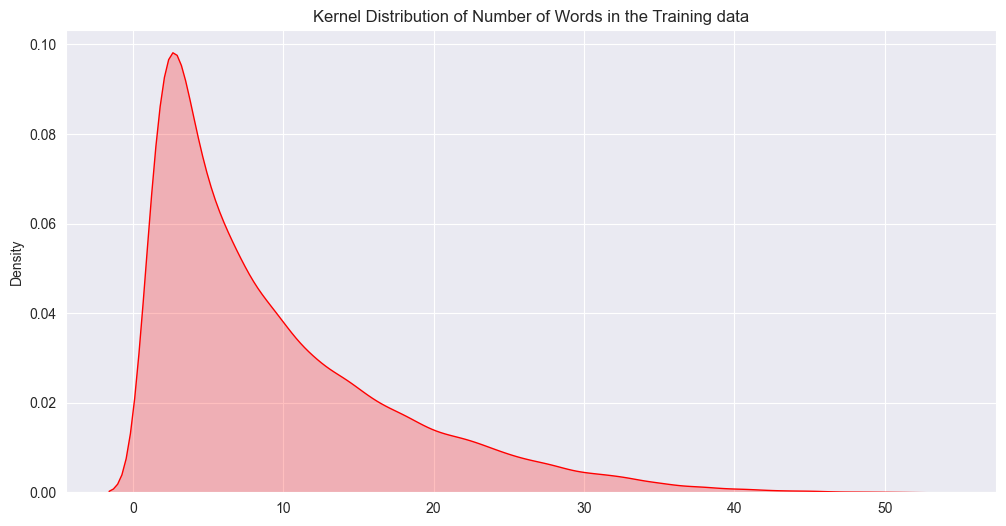

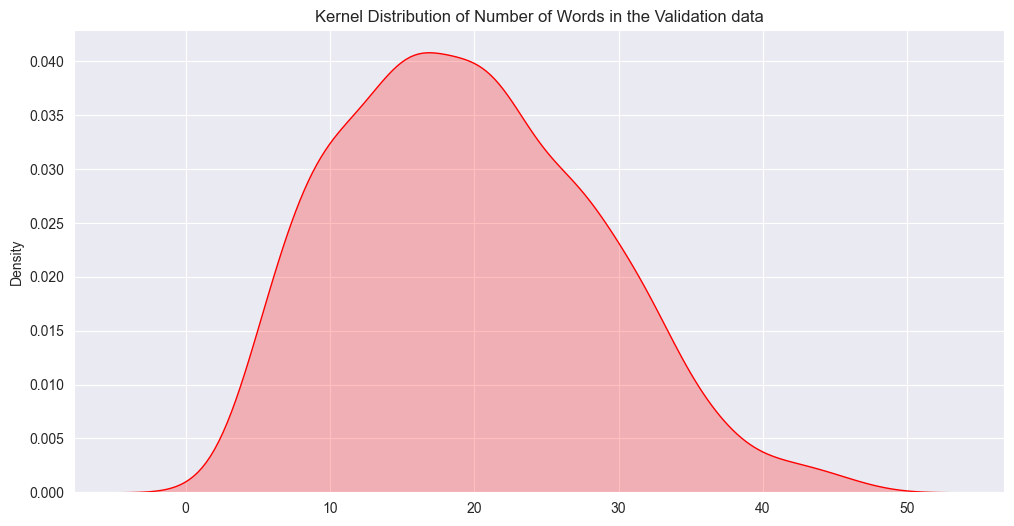

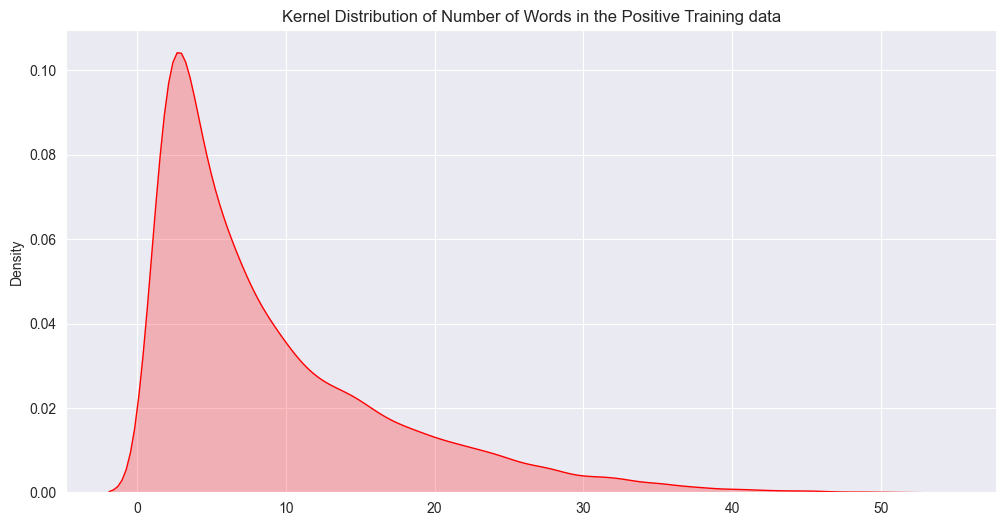

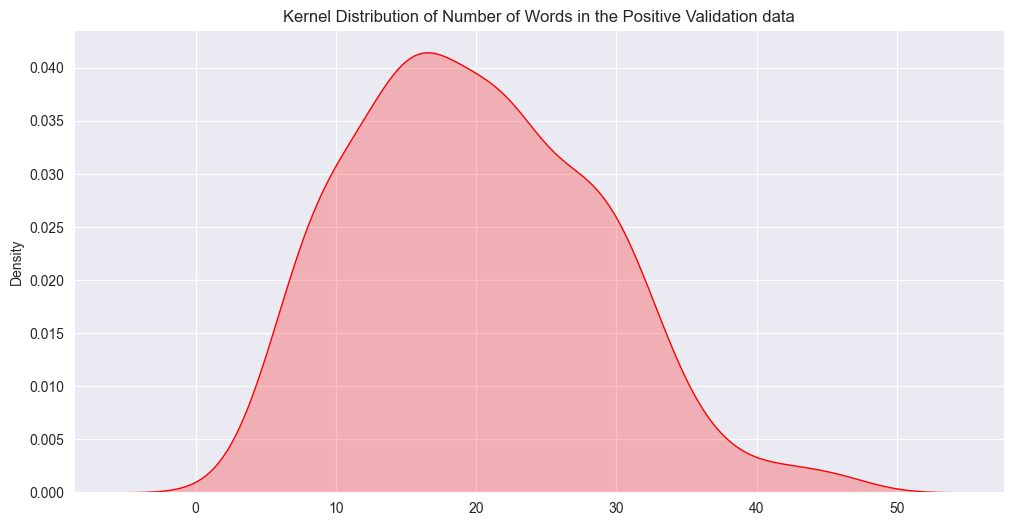

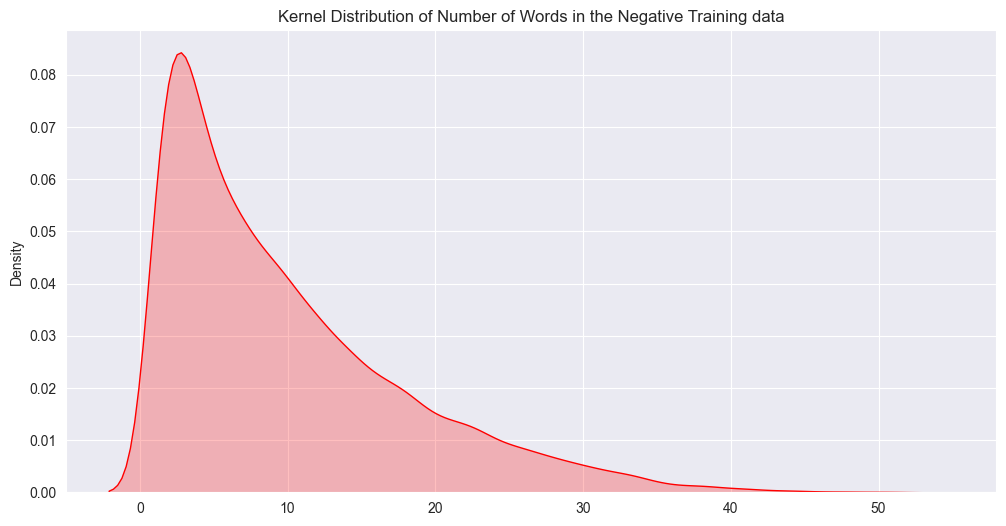

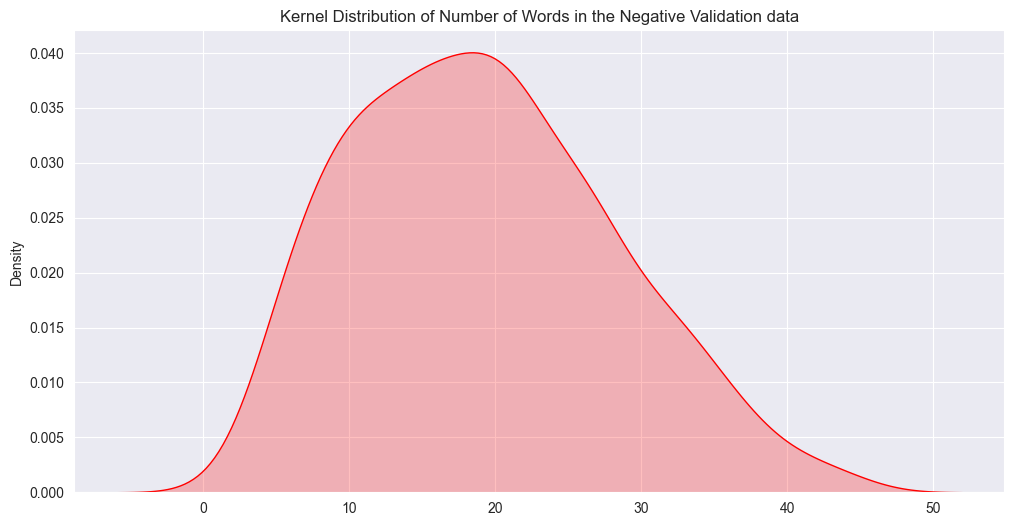

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

asign = lambda x: len(str(x).split())
word_length = list(map(asign, x_train))
plt.figure(figsize=(12,6))
p1=sns.kdeplot(word_length, fill=True, color='r').set_title("Kernel Distribution of Number of Words in the Training data")
word_length = list(map(asign, x_val))
plt.figure(figsize=(12,6))
p1=sns.kdeplot(word_length, fill=True, color='r').set_title("Kernel Distribution of Number of Words in the Validation data")

word_length = list(map(asign, x_train_1))
plt.figure(figsize=(12,6))
p1=sns.kdeplot(word_length, fill=True, color='r').set_title("Kernel Distribution of Number of Words in the Positive Training data")
word_length = list(map(asign, x_val_1))
plt.figure(figsize=(12,6))
p1=sns.kdeplot(word_length, fill=True, color='r').set_title("Kernel Distribution of Number of Words in the Positive Validation data")
word_length = list(map(asign, x_train_0))
plt.figure(figsize=(12,6))
p1=sns.kdeplot(word_length, fill=True, color='r').set_title("Kernel Distribution of Number of Words in the Negative Training data")
word_length = list(map(asign, x_val_0))
plt.figure(figsize=(12,6))
p1=sns.kdeplot(word_length, fill=True, color='r').set_title("Kernel Distribution of Number of Words in the Negative Validation data")

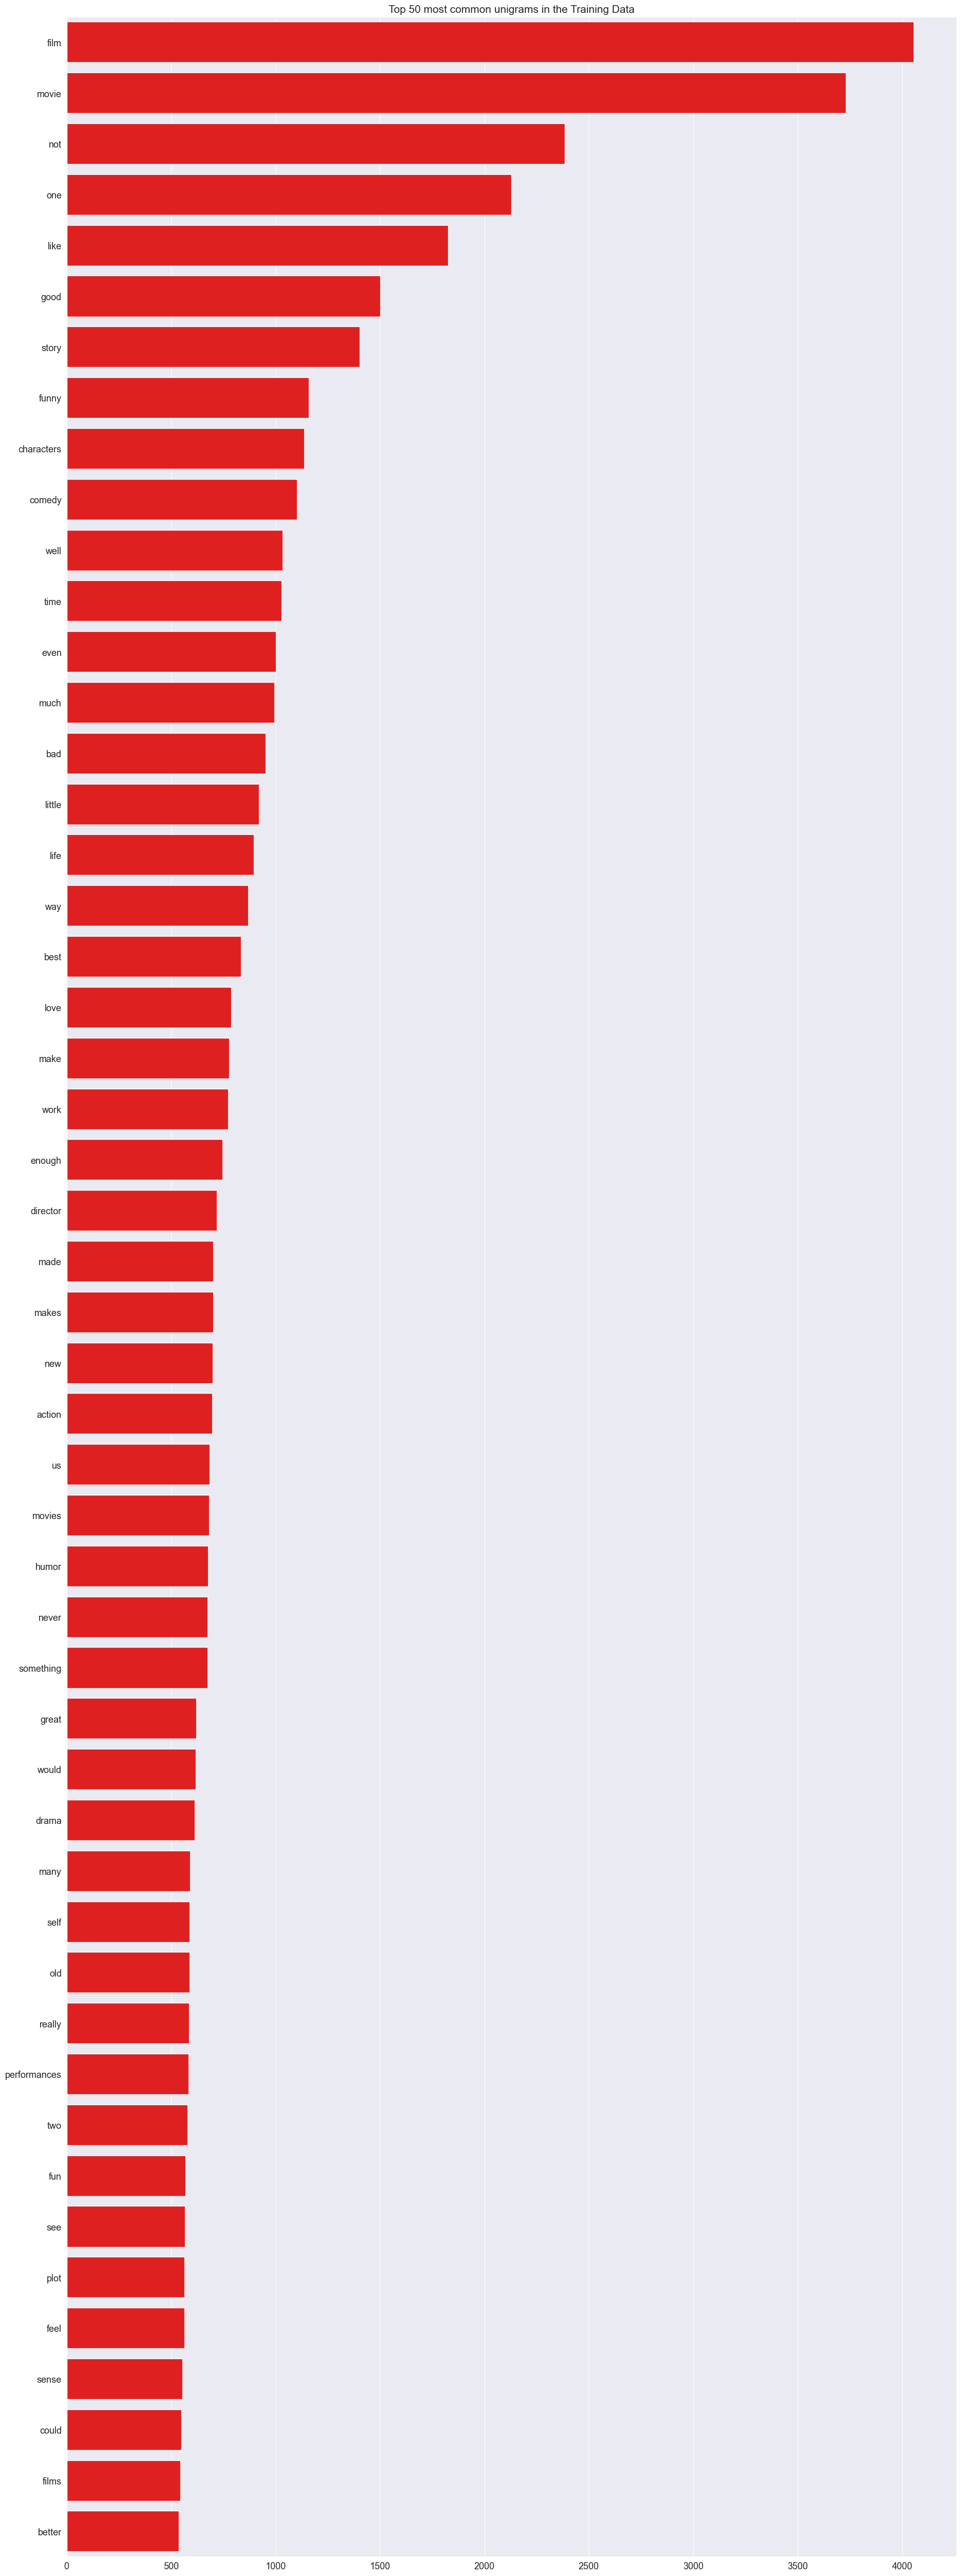

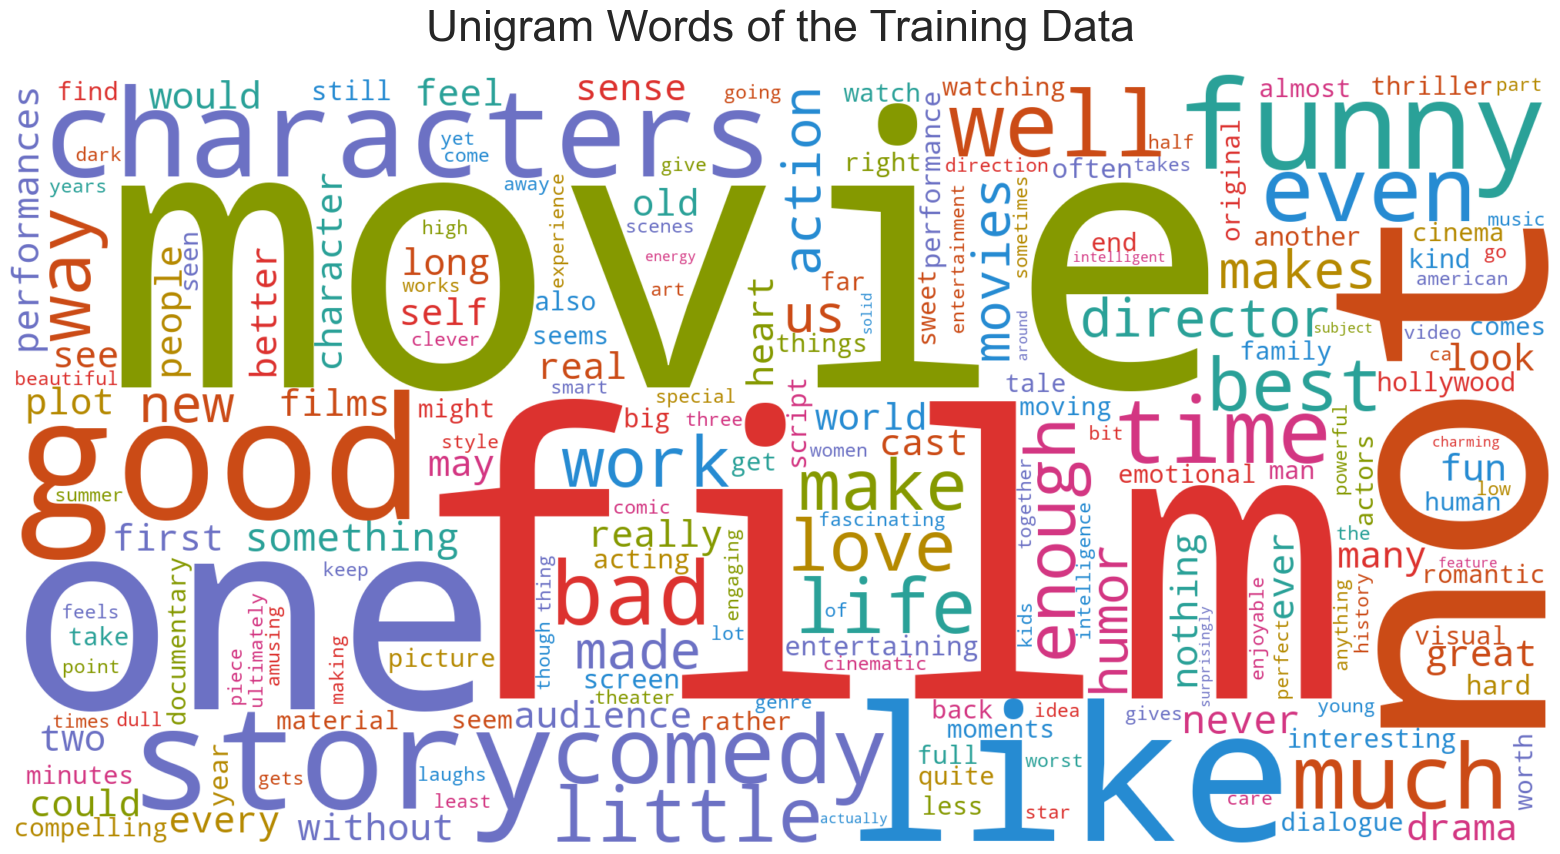

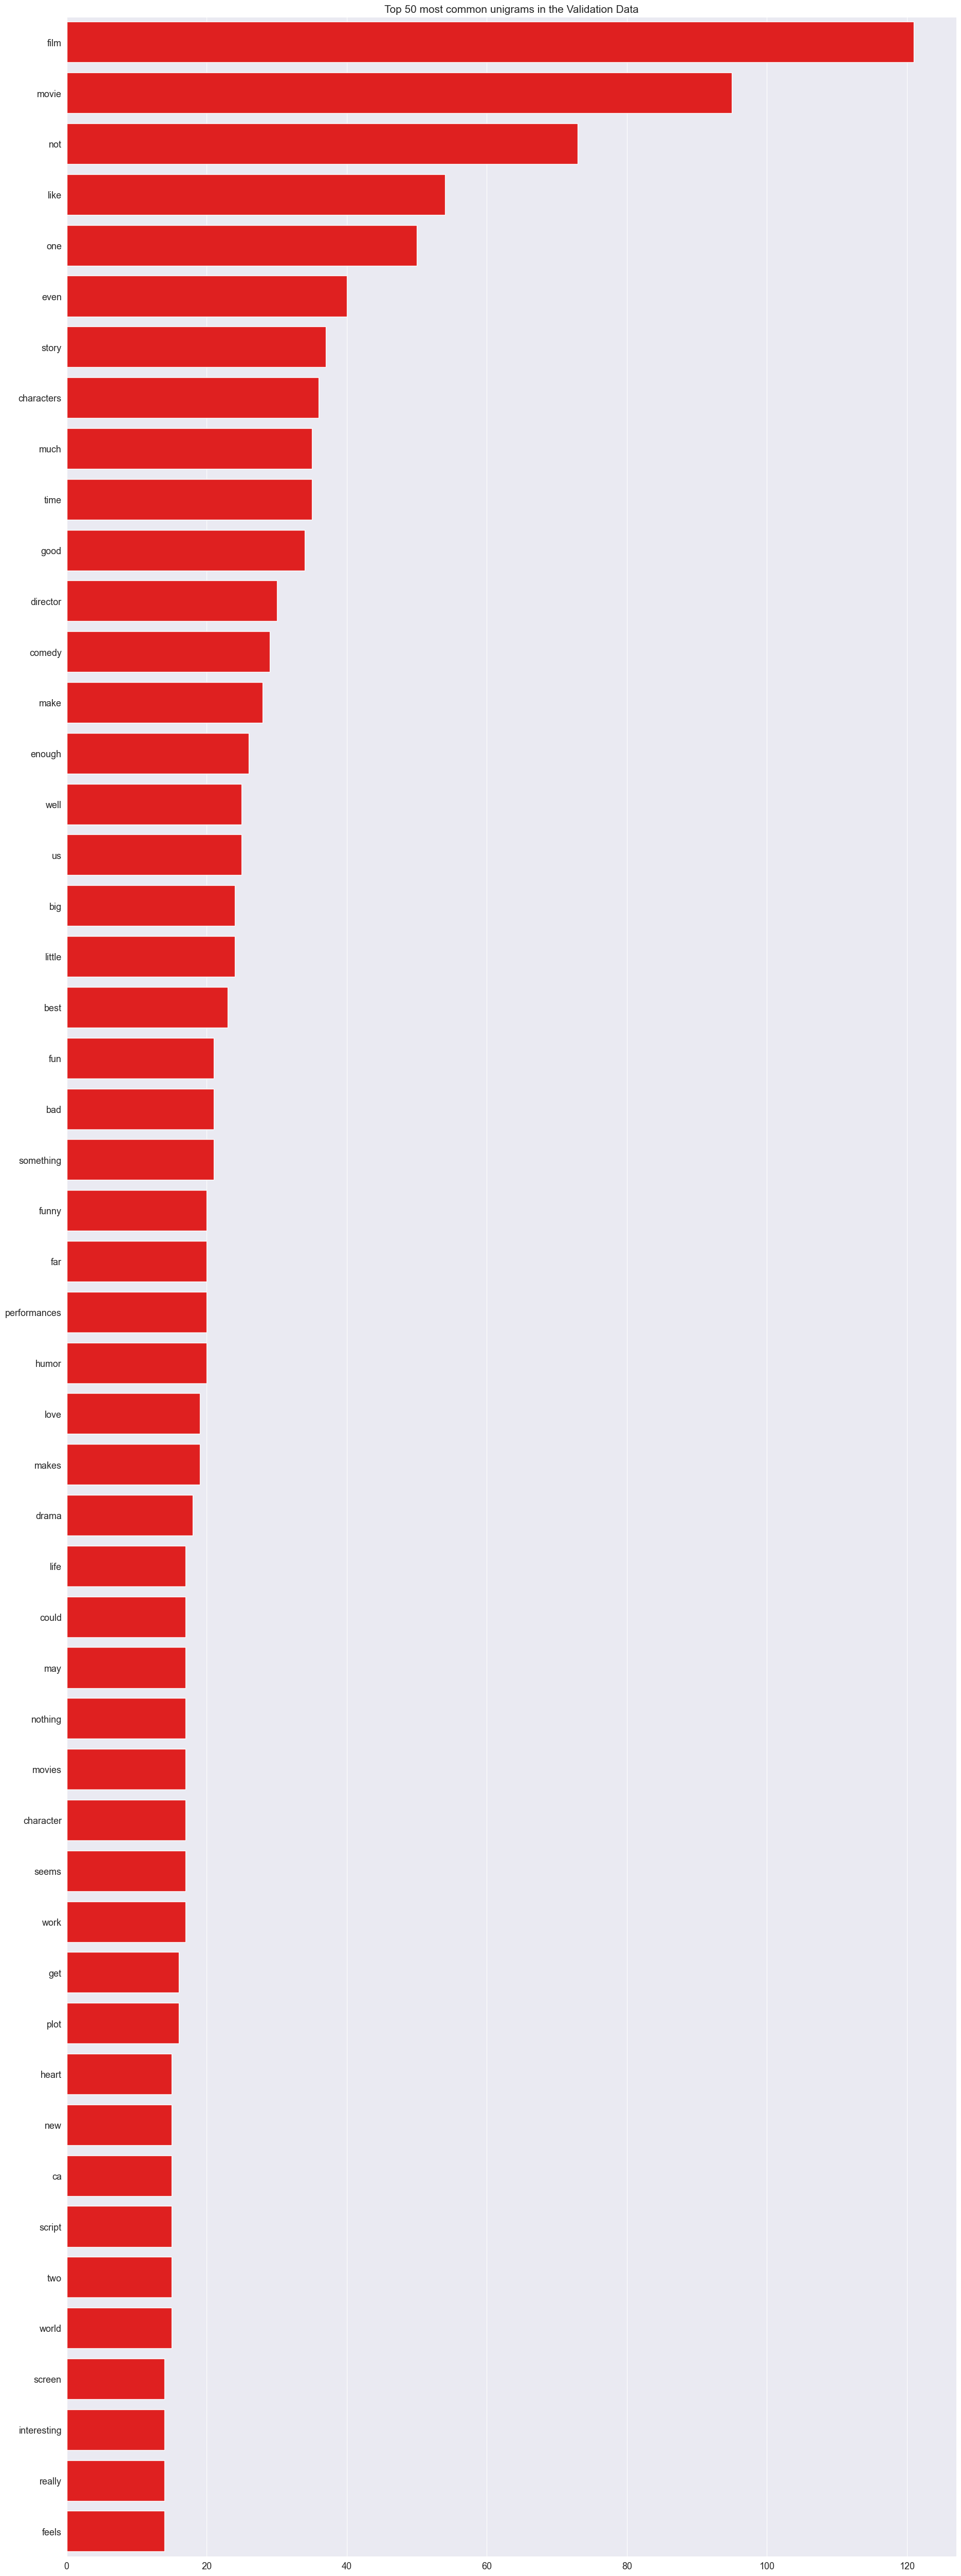

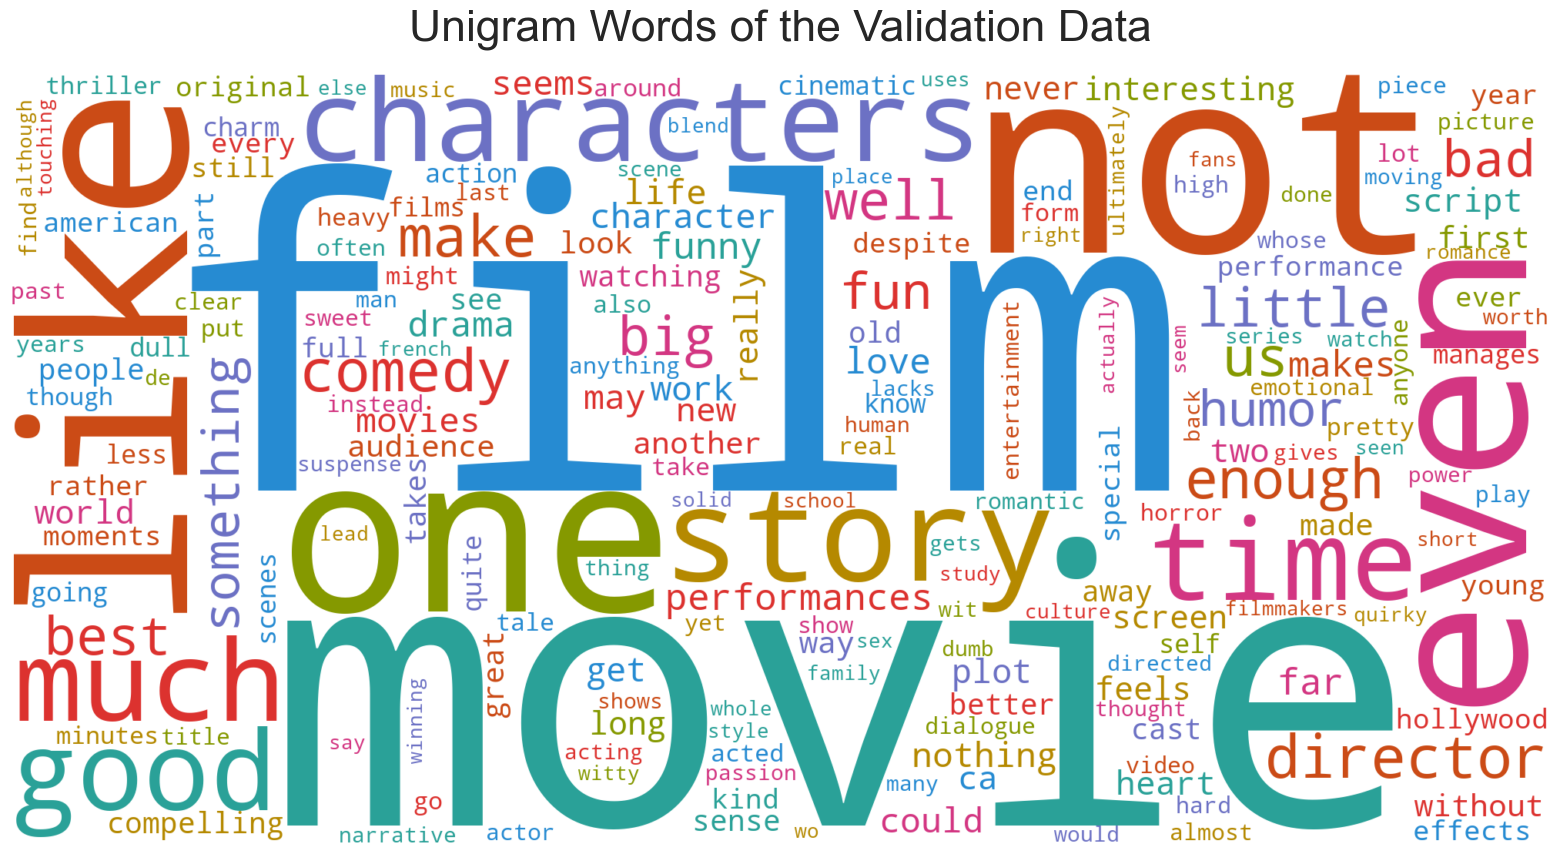

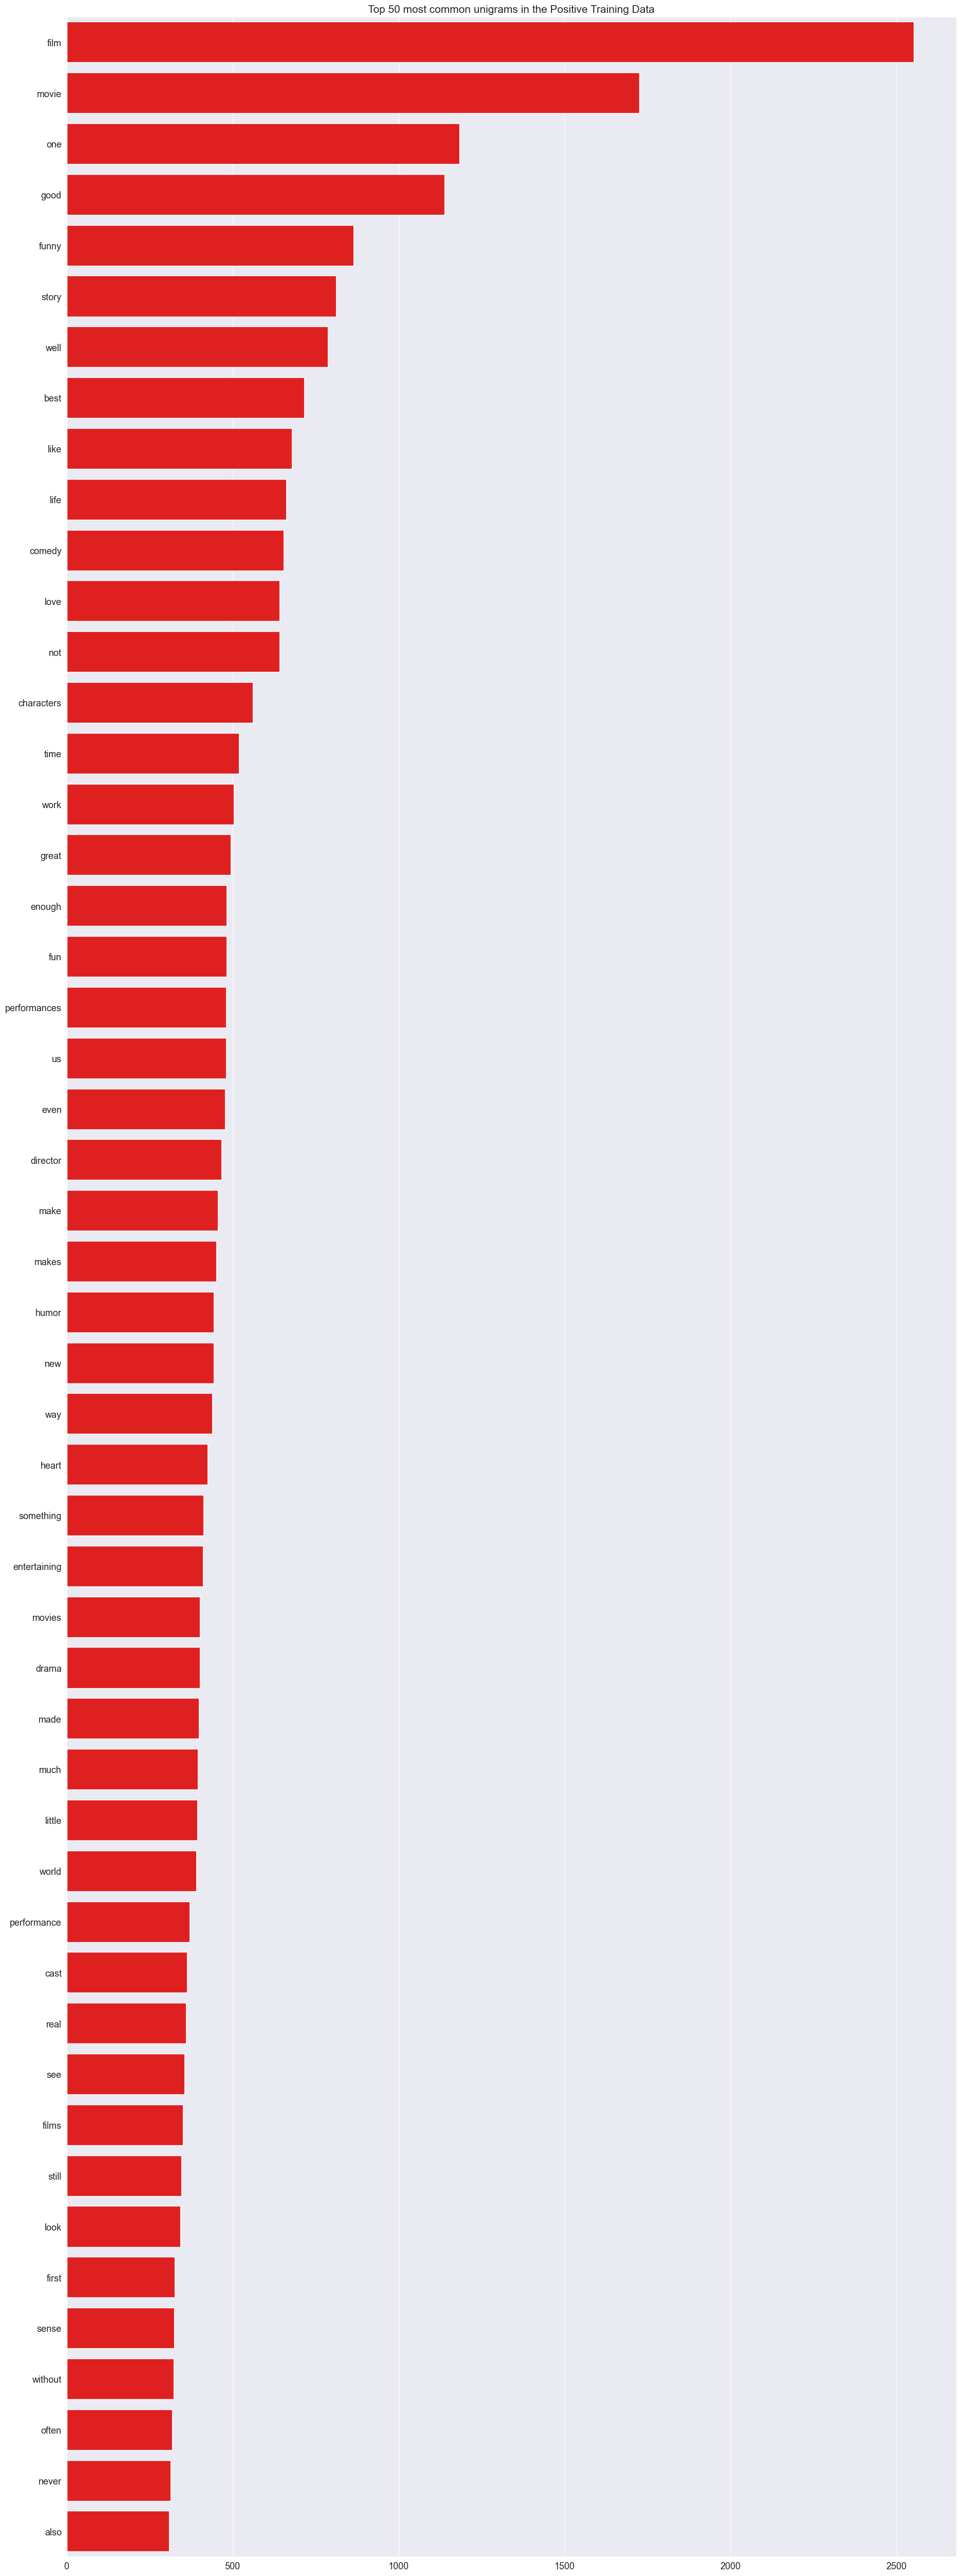

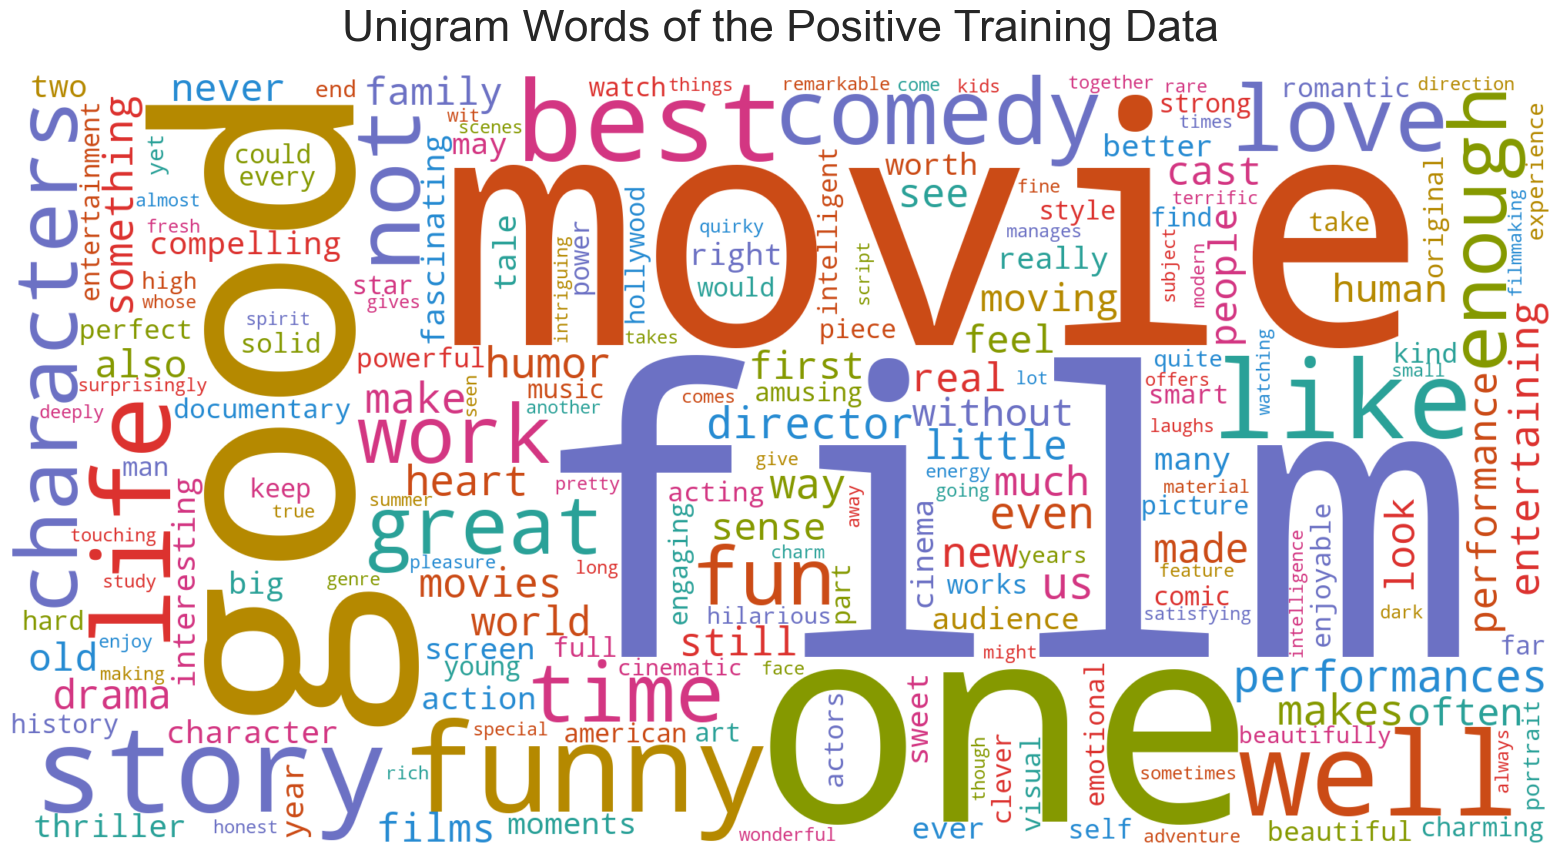

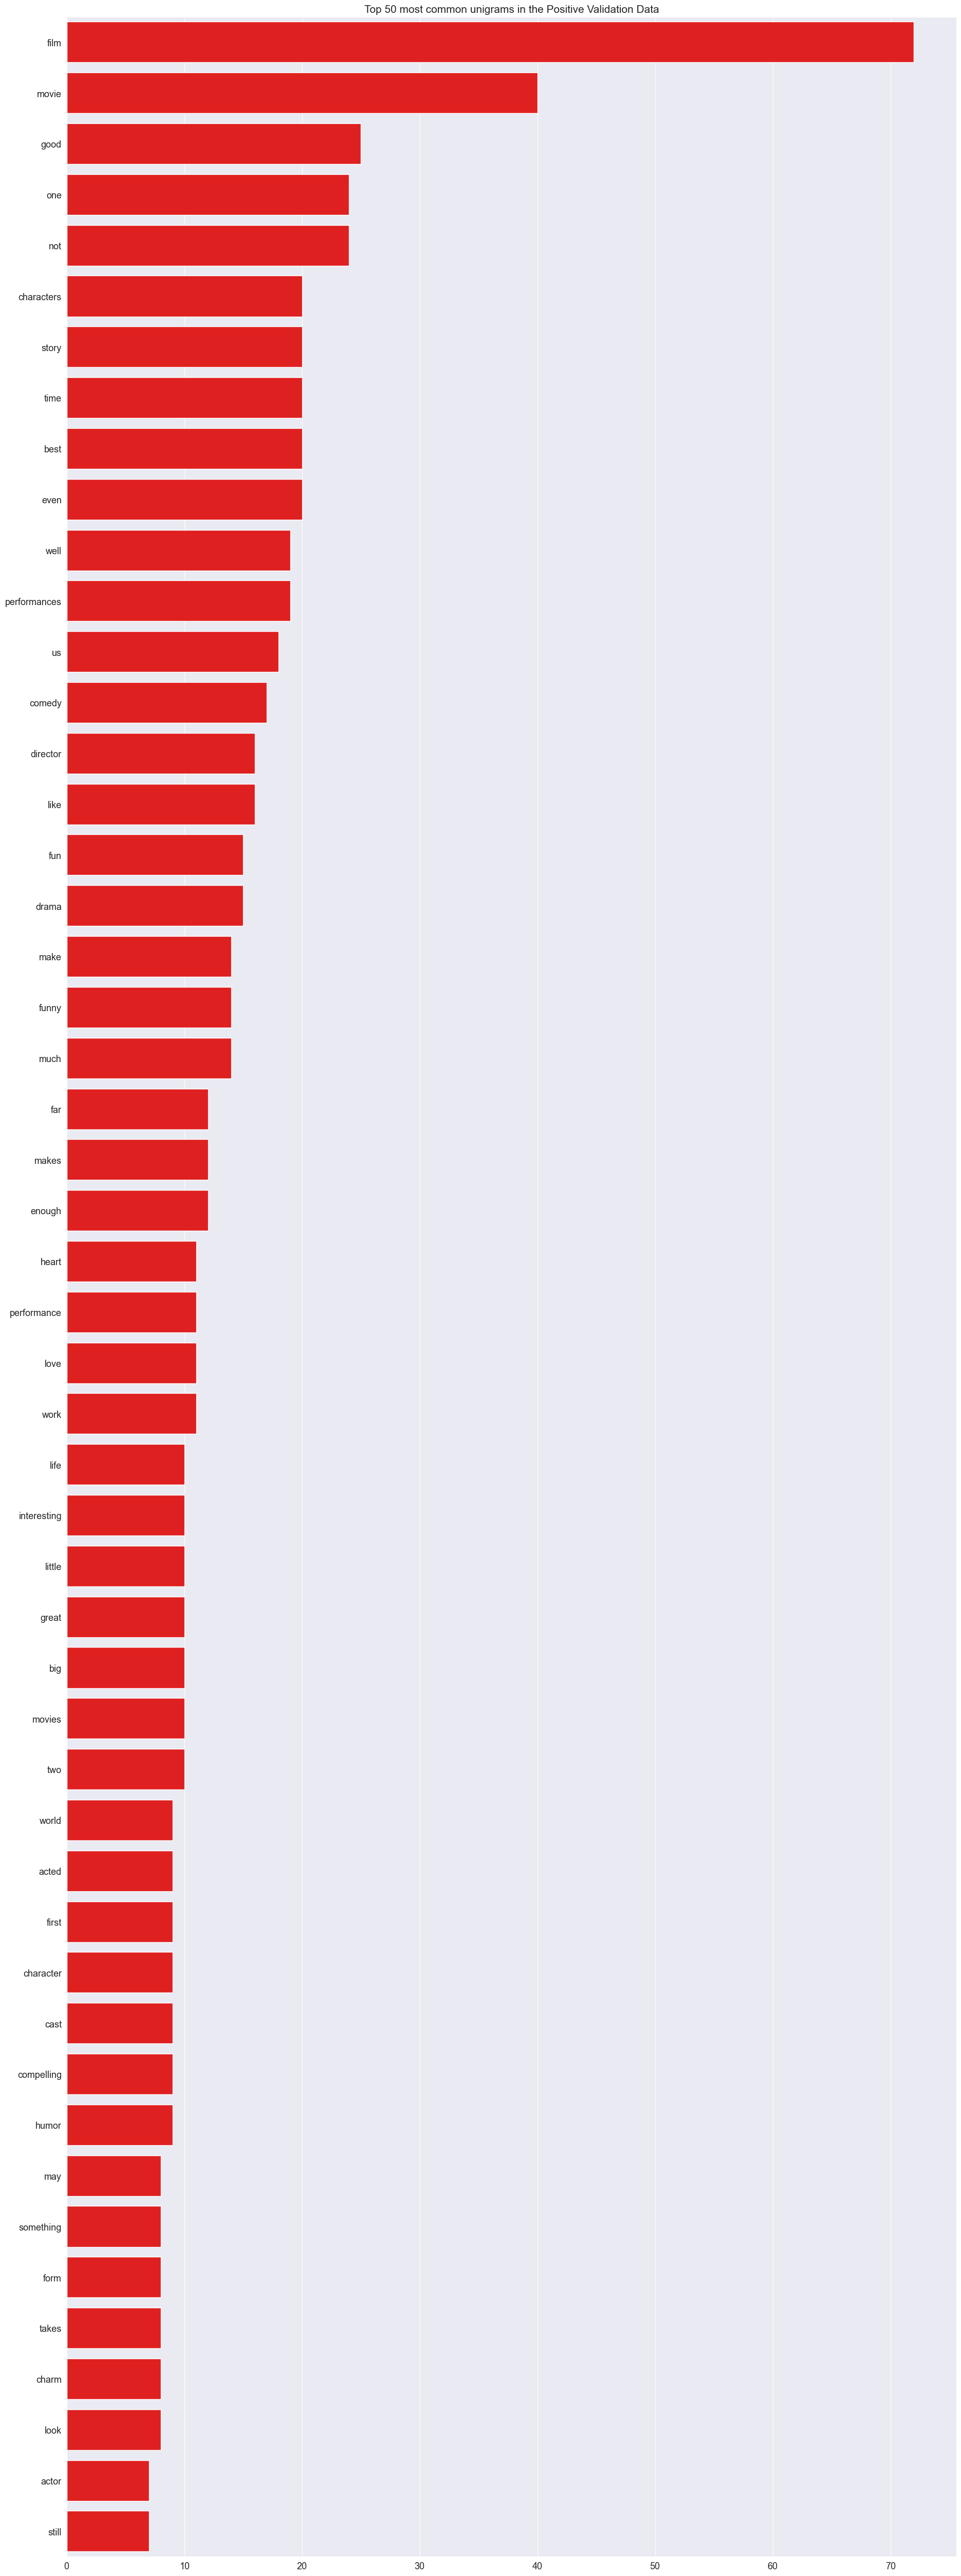

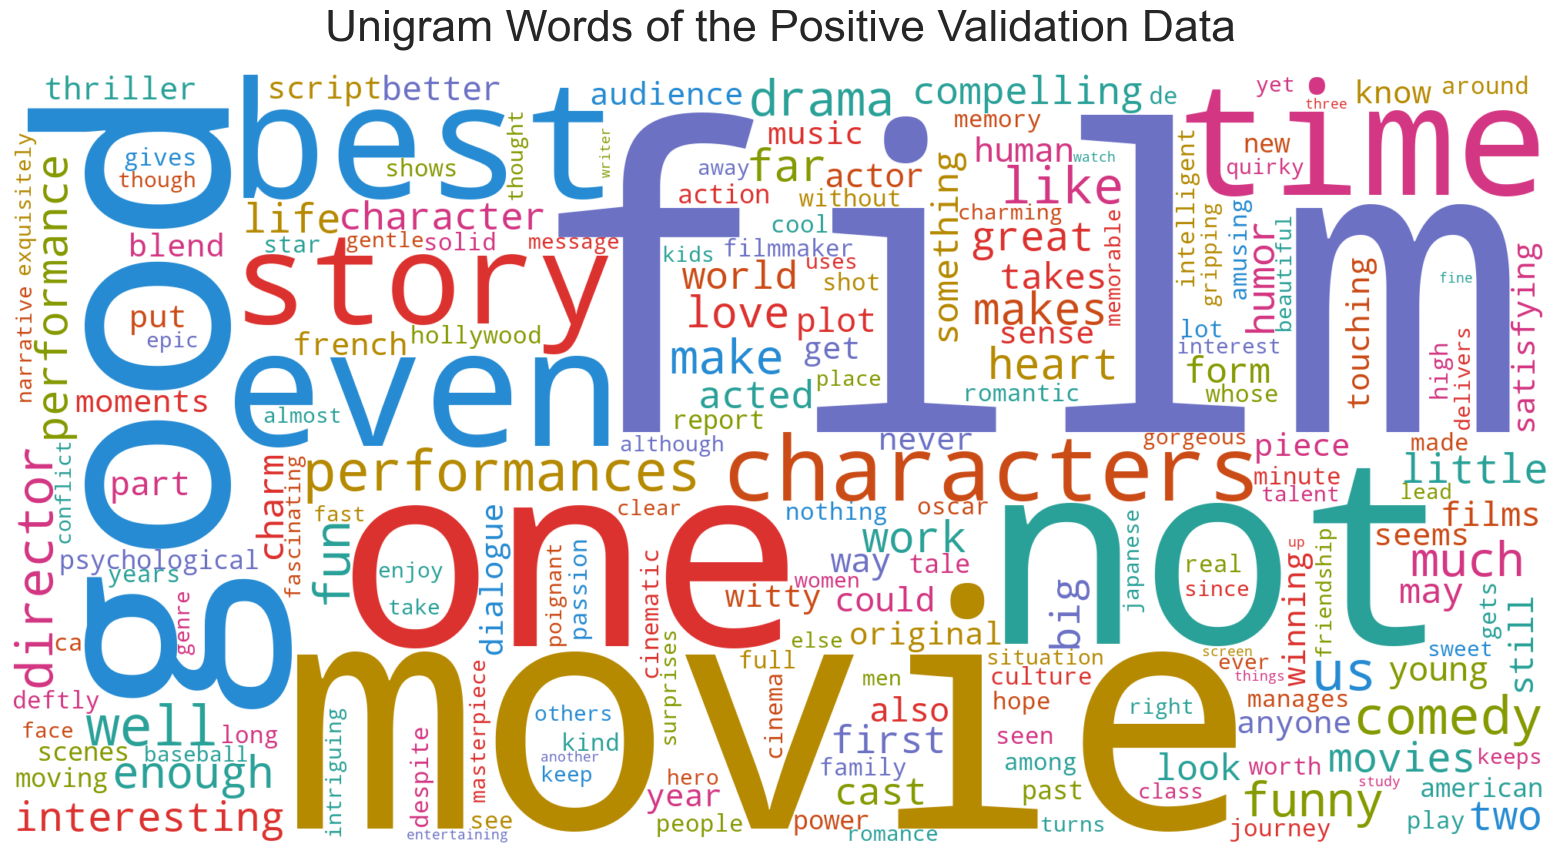

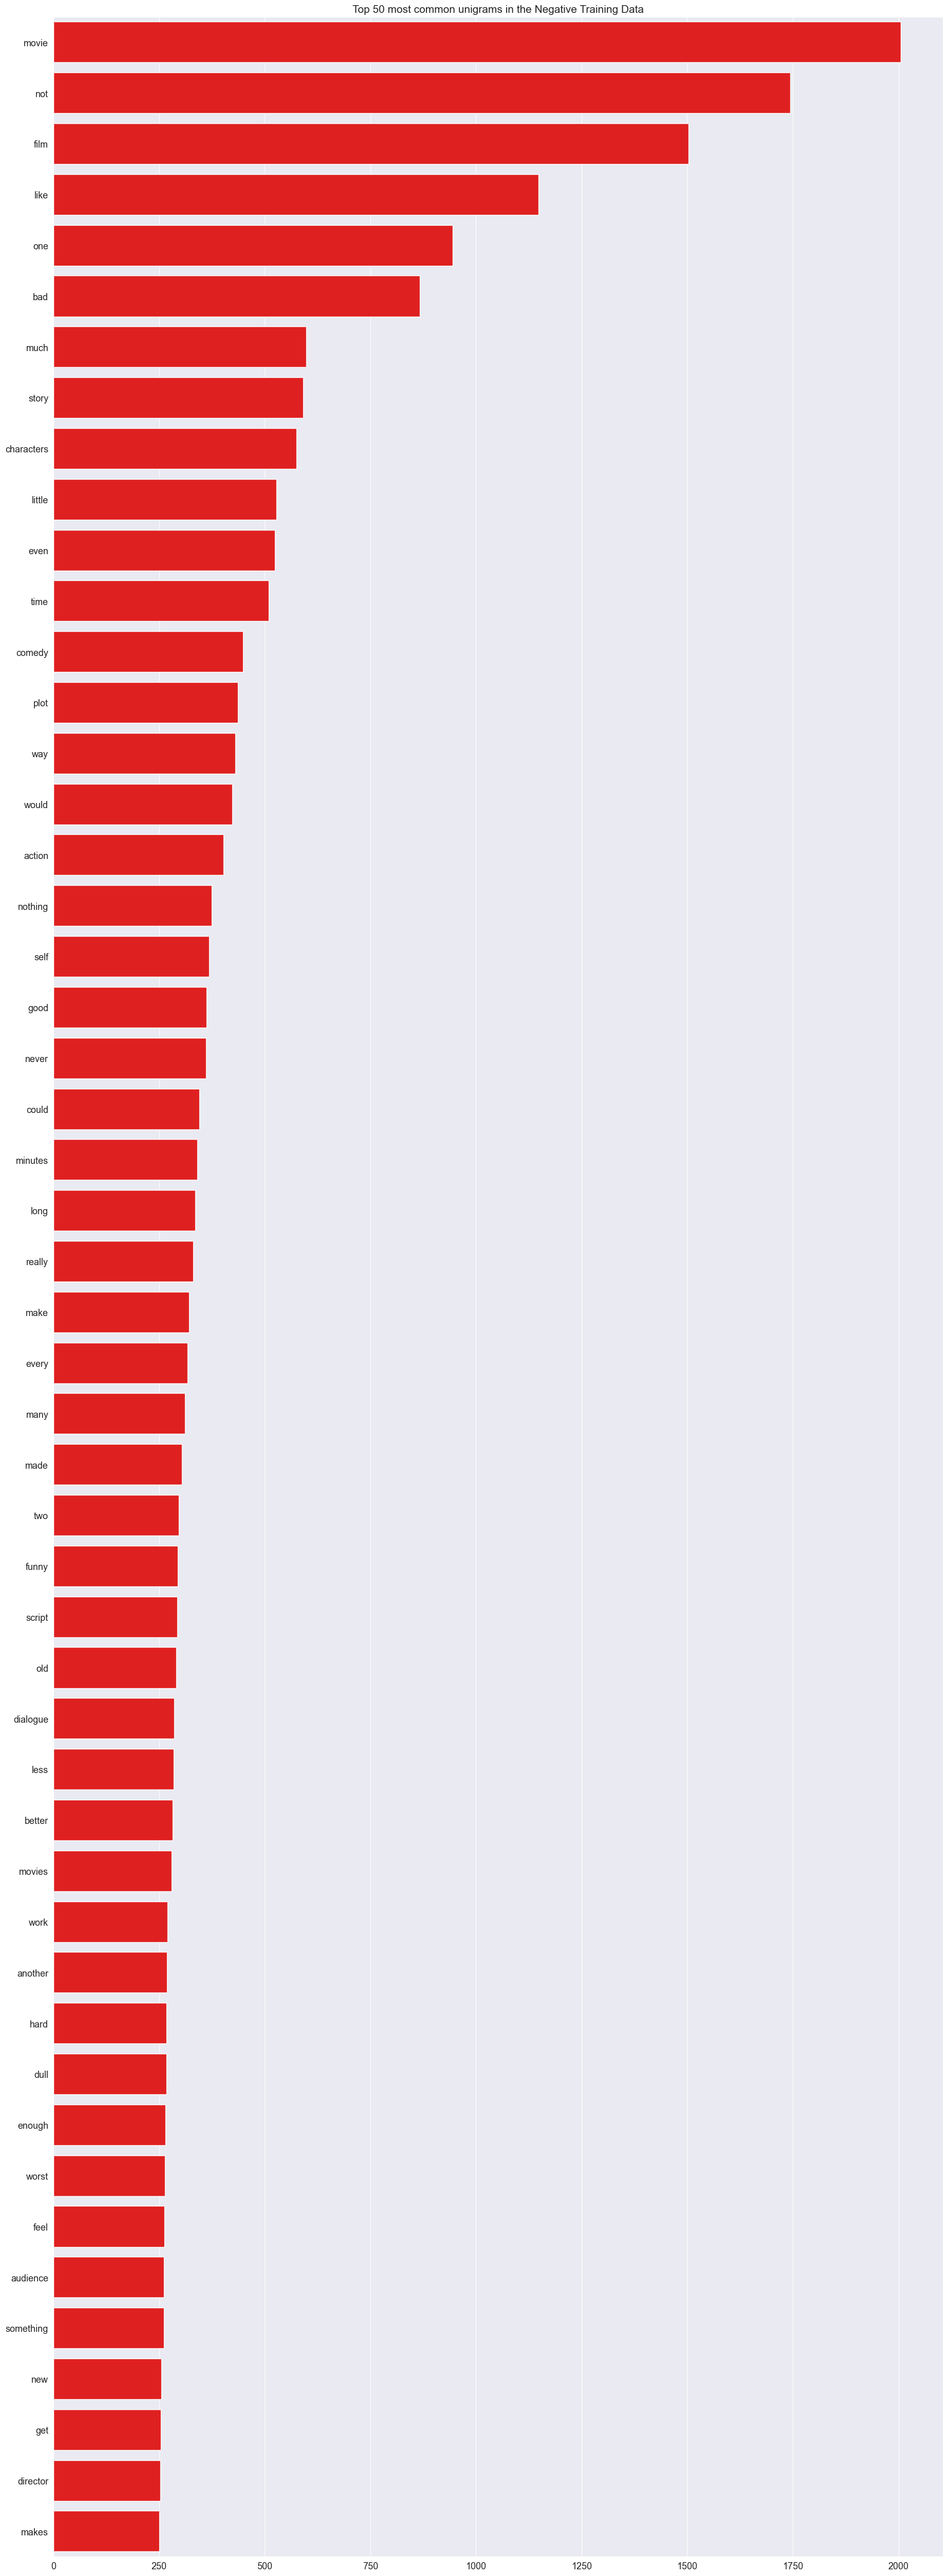

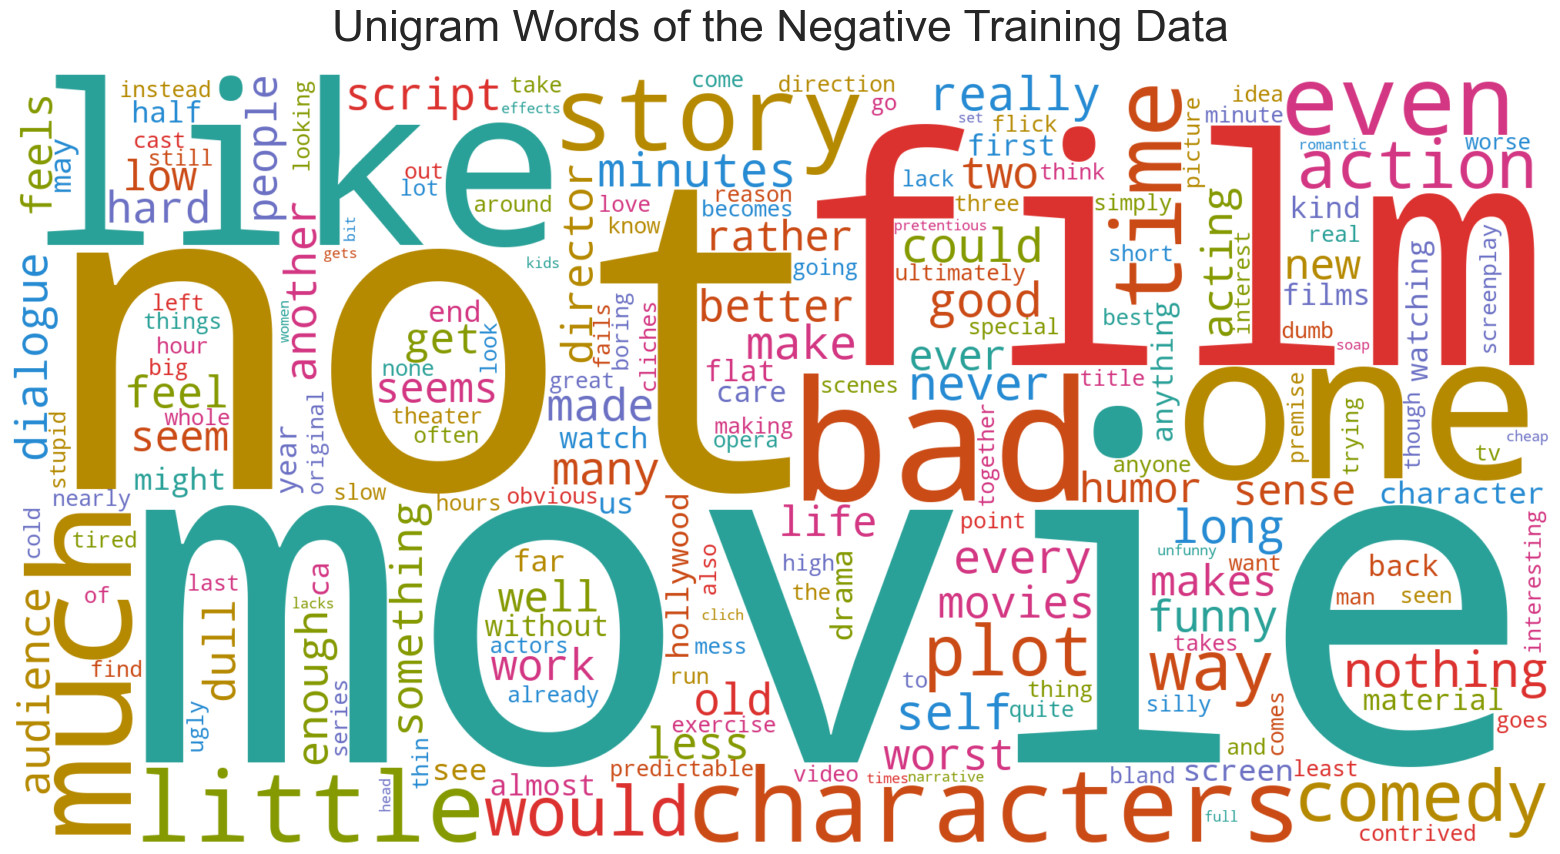

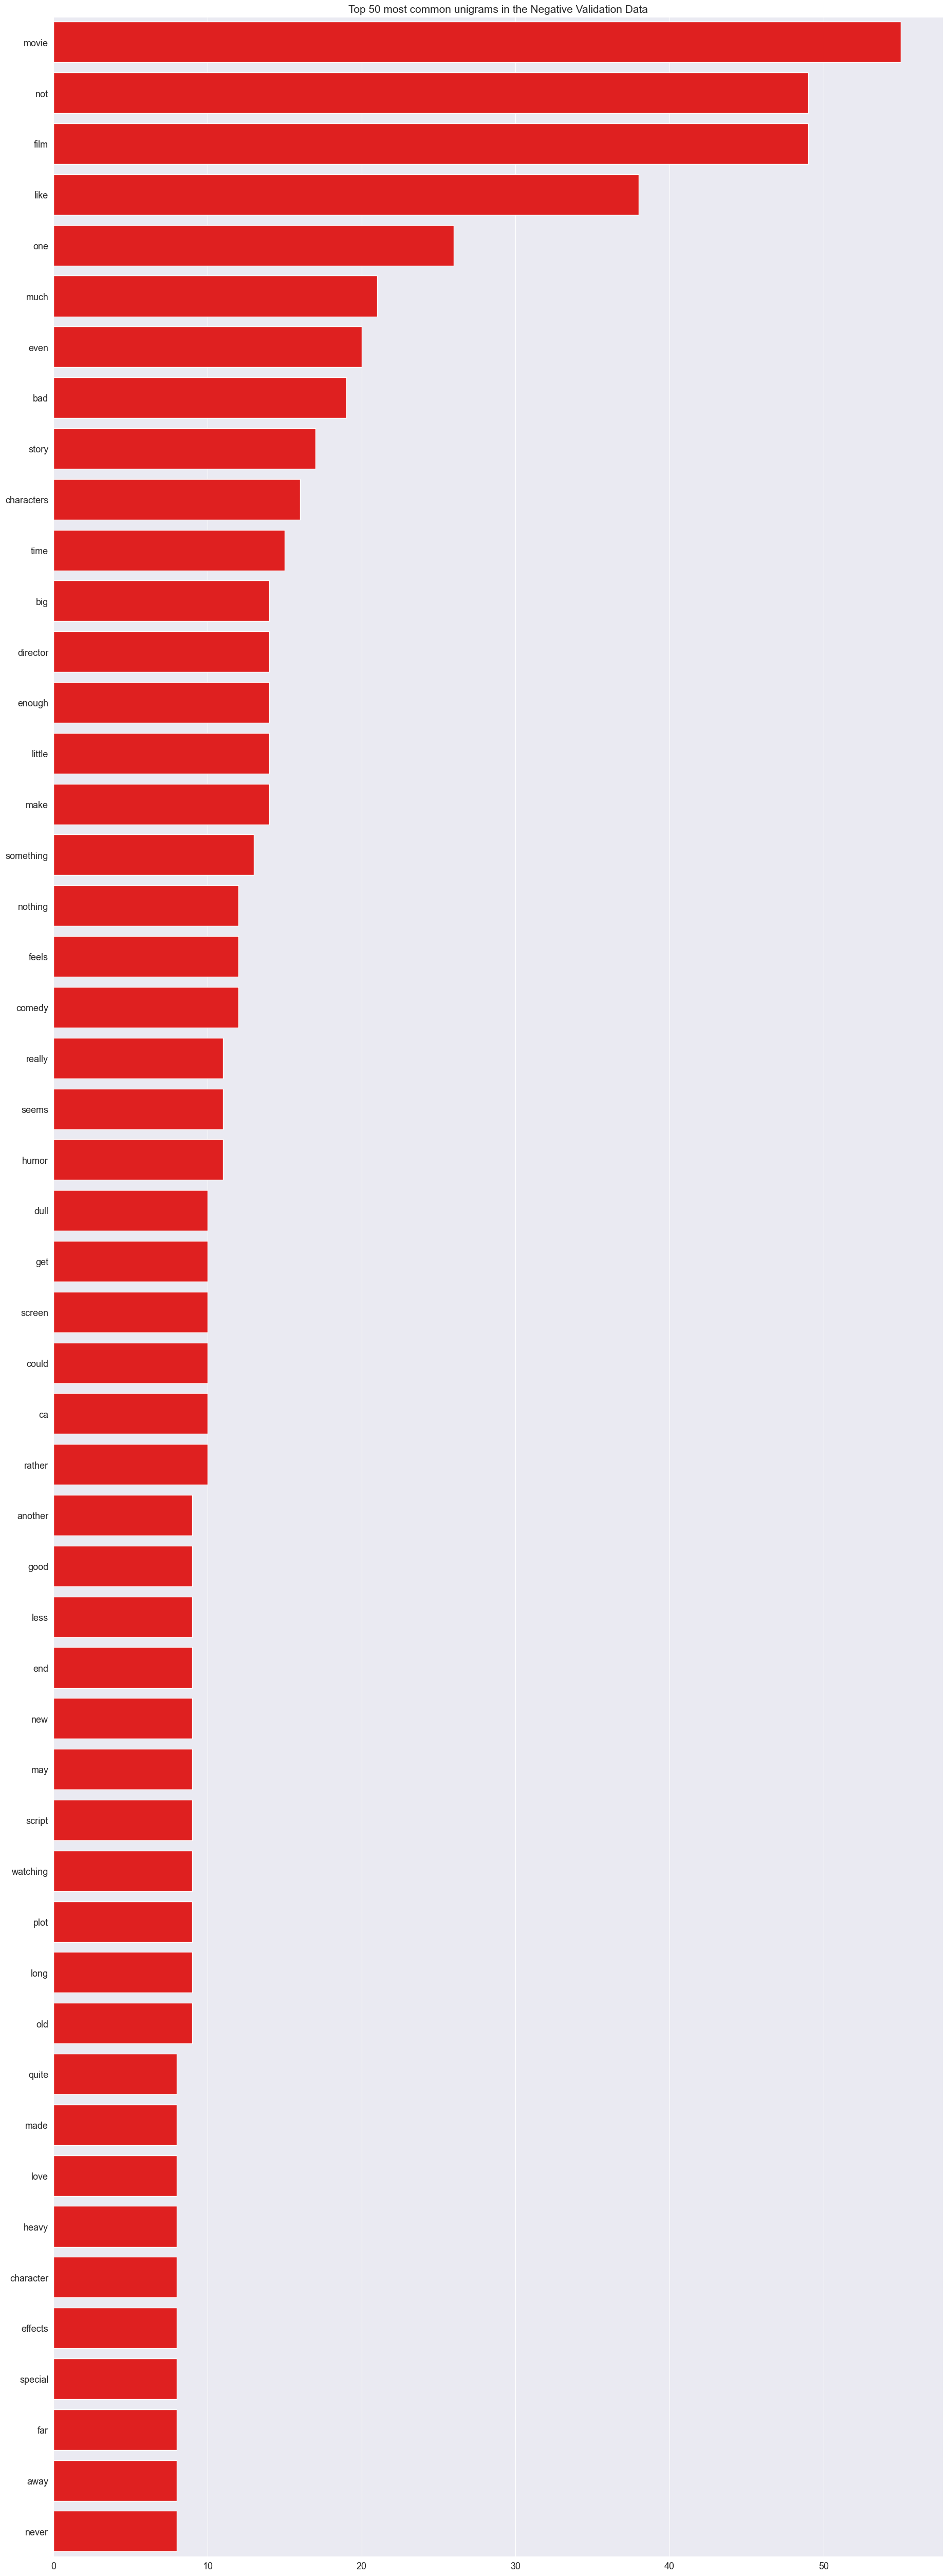

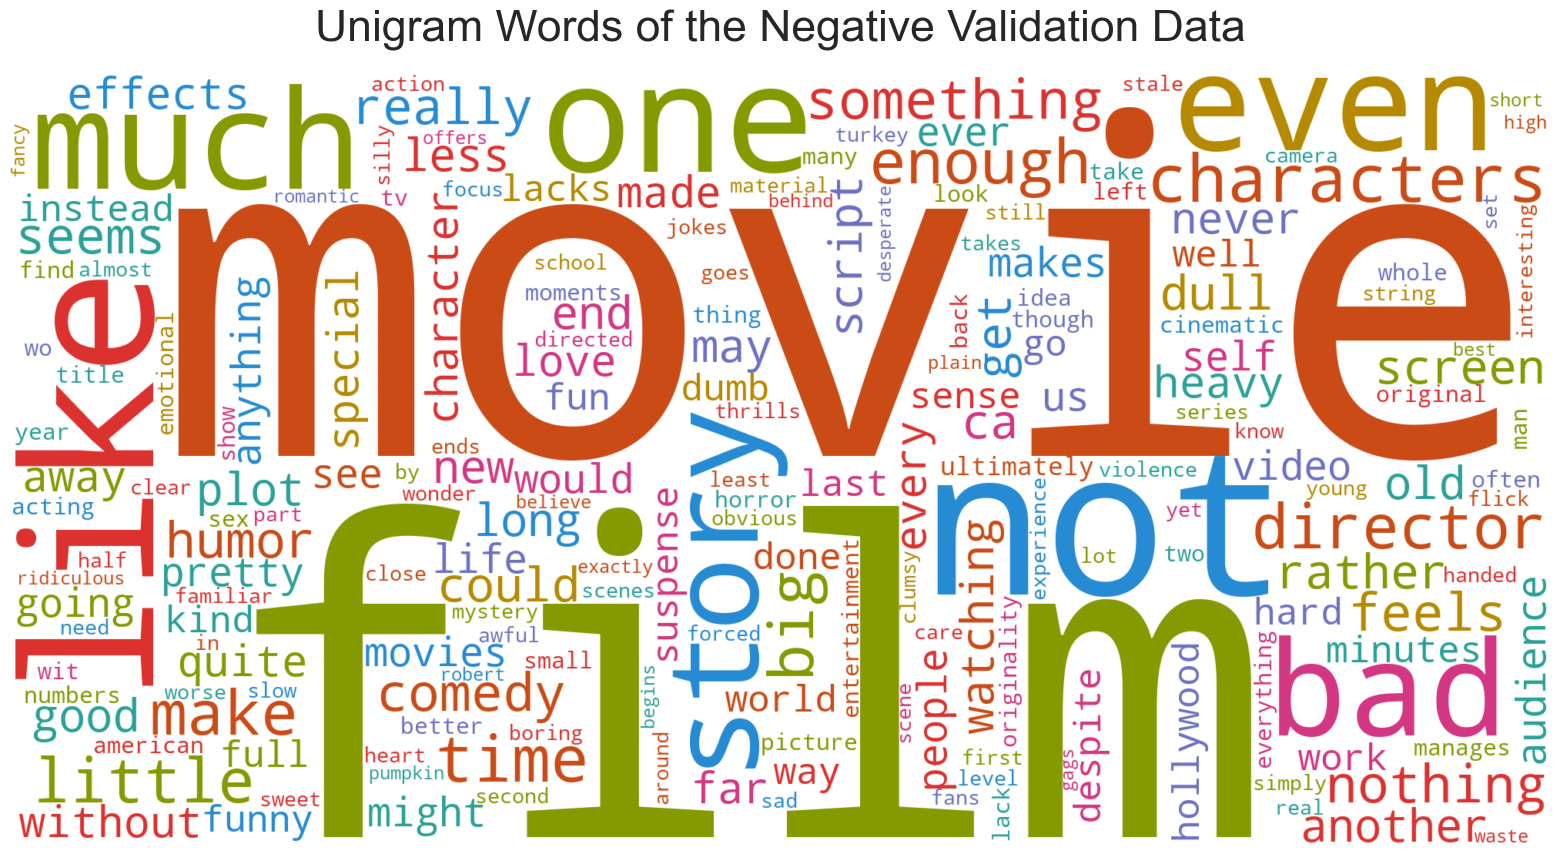

In [11]:
from wordcloud import WordCloud
import numpy as np
import random
import pandas as pd
from collections import defaultdict


def generate_ngrams(text, n_gram=1):
    ngrams = zip(*[text[i:] for i in range(n_gram)])
    return [' '.join(ngram) for ngram in ngrams]


def col_func(word, font_size, position, orientation, font_path, random_state):
    colors = ['#b58900', '#cb4b16', '#dc322f', '#d33682', '#6c71c4', '#268bd2', '#2aa198', '#859900']
    return random.choice(colors)


article_unigrams = defaultdict(int)
for sentence in clean_x_train:
    for word in sentence.split():
        if word == 'n':
            word = 'not'
        article_unigrams[word] += 1
article_unigrams_df = pd.DataFrame(sorted(article_unigrams.items(), key=lambda x: x[1])[::-1])
N=50
unigramfig, axes = plt.subplots(figsize=(18, 50))
plt.tight_layout()
sns.barplot(y=article_unigrams_df[0].values[:N], x=article_unigrams_df[1].values[:N], color='red')
axes.spines['right'].set_visible(False)
axes.set_xlabel('')
axes.set_ylabel('')
axes.tick_params(axis='x', labelsize=13)
axes.tick_params(axis='y', labelsize=13)
axes.set_title(f'Top {N} most common unigrams in the Training Data', fontsize=15)
plt.show()
fd = { 'fontsize': '32', 'fontweight' : 'normal', 'verticalalignment': 'baseline', 'horizontalalignment': 'center',}
wc = WordCloud(width=2000, height=1000, collocations=False, background_color="white", color_func=col_func, max_words=200, random_state=np.random.randint(1, 8)).generate_from_frequencies(article_unigrams)
fig, ax = plt.subplots(figsize=(20,10))
ax.imshow(wc, interpolation='bilinear')
ax.axis("off")
ax.set_title("Unigram Words of the Training Data", pad=24, fontdict=fd)
plt.show()

article_unigrams = defaultdict(int)
for sentence in clean_x_val:
    for word in sentence.split():
        if word == 'n':
            word = 'not'
        article_unigrams[word] += 1
article_unigrams_df = pd.DataFrame(sorted(article_unigrams.items(), key=lambda x: x[1])[::-1])
N=50
unigramfig, axes = plt.subplots(figsize=(18, 50))
plt.tight_layout()
sns.barplot(y=article_unigrams_df[0].values[:N], x=article_unigrams_df[1].values[:N], color='red')
axes.spines['right'].set_visible(False)
axes.set_xlabel('')
axes.set_ylabel('')
axes.tick_params(axis='x', labelsize=13)
axes.tick_params(axis='y', labelsize=13)
axes.set_title(f'Top {N} most common unigrams in the Validation Data', fontsize=15)
plt.show()
fd = { 'fontsize': '32', 'fontweight' : 'normal', 'verticalalignment': 'baseline', 'horizontalalignment': 'center',}
wc = WordCloud(width=2000, height=1000, collocations=False, background_color="white", color_func=col_func, max_words=200, random_state=np.random.randint(1, 8)).generate_from_frequencies(article_unigrams)
fig, ax = plt.subplots(figsize=(20,10))
ax.imshow(wc, interpolation='bilinear')
ax.axis("off")
ax.set_title("Unigram Words of the Validation Data", pad=24, fontdict=fd)
plt.show()

article_unigrams = defaultdict(int)
for sentence in clean_x_train_1:
    for word in sentence.split():
        if word == 'n':
            word = 'not'
        article_unigrams[word] += 1
article_unigrams_df = pd.DataFrame(sorted(article_unigrams.items(), key=lambda x: x[1])[::-1])
N=50
unigramfig, axes = plt.subplots(figsize=(18, 50))
plt.tight_layout()
sns.barplot(y=article_unigrams_df[0].values[:N], x=article_unigrams_df[1].values[:N], color='red')
axes.spines['right'].set_visible(False)
axes.set_xlabel('')
axes.set_ylabel('')
axes.tick_params(axis='x', labelsize=13)
axes.tick_params(axis='y', labelsize=13)
axes.set_title(f'Top {N} most common unigrams in the Positive Training Data', fontsize=15)
plt.show()
fd = { 'fontsize': '32', 'fontweight' : 'normal', 'verticalalignment': 'baseline', 'horizontalalignment': 'center',}
wc = WordCloud(width=2000, height=1000, collocations=False, background_color="white", color_func=col_func, max_words=200, random_state=np.random.randint(1, 8)).generate_from_frequencies(article_unigrams)
fig, ax = plt.subplots(figsize=(20,10))
ax.imshow(wc, interpolation='bilinear')
ax.axis("off")
ax.set_title("Unigram Words of the Positive Training Data", pad=24, fontdict=fd)
plt.show()

article_unigrams = defaultdict(int)
for sentence in clean_x_val_1:
    for word in sentence.split():
        if word == 'n':
            word = 'not'
        article_unigrams[word] += 1
article_unigrams_df = pd.DataFrame(sorted(article_unigrams.items(), key=lambda x: x[1])[::-1])
N=50
unigramfig, axes = plt.subplots(figsize=(18, 50))
plt.tight_layout()
sns.barplot(y=article_unigrams_df[0].values[:N], x=article_unigrams_df[1].values[:N], color='red')
axes.spines['right'].set_visible(False)
axes.set_xlabel('')
axes.set_ylabel('')
axes.tick_params(axis='x', labelsize=13)
axes.tick_params(axis='y', labelsize=13)
axes.set_title(f'Top {N} most common unigrams in the Positive Validation Data', fontsize=15)
plt.show()
fd = { 'fontsize': '32', 'fontweight' : 'normal', 'verticalalignment': 'baseline', 'horizontalalignment': 'center',}
wc = WordCloud(width=2000, height=1000, collocations=False, background_color="white", color_func=col_func, max_words=200, random_state=np.random.randint(1, 8)).generate_from_frequencies(article_unigrams)
fig, ax = plt.subplots(figsize=(20,10))
ax.imshow(wc, interpolation='bilinear')
ax.axis("off")
ax.set_title("Unigram Words of the Positive Validation Data", pad=24, fontdict=fd)
plt.show()

article_unigrams = defaultdict(int)
for sentence in clean_x_train_0:
    for word in sentence.split():
        if word == 'n':
            word = 'not'
        article_unigrams[word] += 1
article_unigrams_df = pd.DataFrame(sorted(article_unigrams.items(), key=lambda x: x[1])[::-1])
N=50
unigramfig, axes = plt.subplots(figsize=(18, 50))
plt.tight_layout()
sns.barplot(y=article_unigrams_df[0].values[:N], x=article_unigrams_df[1].values[:N], color='red')
axes.spines['right'].set_visible(False)
axes.set_xlabel('')
axes.set_ylabel('')
axes.tick_params(axis='x', labelsize=13)
axes.tick_params(axis='y', labelsize=13)
axes.set_title(f'Top {N} most common unigrams in the Negative Training Data', fontsize=15)
plt.show()
fd = { 'fontsize': '32', 'fontweight' : 'normal', 'verticalalignment': 'baseline', 'horizontalalignment': 'center',}
wc = WordCloud(width=2000, height=1000, collocations=False, background_color="white", color_func=col_func, max_words=200, random_state=np.random.randint(1, 8)).generate_from_frequencies(article_unigrams)
fig, ax = plt.subplots(figsize=(20,10))
ax.imshow(wc, interpolation='bilinear')
ax.axis("off")
ax.set_title("Unigram Words of the Negative Training Data", pad=24, fontdict=fd)
plt.show()

article_unigrams = defaultdict(int)
for sentence in clean_x_val_0:
    for word in sentence.split():
        if word == 'n':
            word = 'not'
        article_unigrams[word] += 1
article_unigrams_df = pd.DataFrame(sorted(article_unigrams.items(), key=lambda x: x[1])[::-1])
N=50
unigramfig, axes = plt.subplots(figsize=(18, 50))
plt.tight_layout()
sns.barplot(y=article_unigrams_df[0].values[:N], x=article_unigrams_df[1].values[:N], color='red')
axes.spines['right'].set_visible(False)
axes.set_xlabel('')
axes.set_ylabel('')
axes.tick_params(axis='x', labelsize=13)
axes.tick_params(axis='y', labelsize=13)
axes.set_title(f'Top {N} most common unigrams in the Negative Validation Data', fontsize=15)
plt.show()
fd = { 'fontsize': '32', 'fontweight' : 'normal', 'verticalalignment': 'baseline', 'horizontalalignment': 'center',}
wc = WordCloud(width=2000, height=1000, collocations=False, background_color="white", color_func=col_func, max_words=200, random_state=np.random.randint(1, 8)).generate_from_frequencies(article_unigrams)
fig, ax = plt.subplots(figsize=(20,10))
ax.imshow(wc, interpolation='bilinear')
ax.axis("off")
ax.set_title("Unigram Words of the Negative Validation Data", pad=24, fontdict=fd)
plt.show()

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

In [ ]:
vectorizer = TfidfVectorizer(max_features=4000)
vec_train = vectorizer.fit_transform(x_train)
vec_val = vectorizer.transform(x_val)

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics

In [ ]:
# rfc = RandomForestClassifier()
# svc = SVC()
lr = LogisticRegression(max_iter=1000)

# rfc.fit(x, labels)
# svc.fit(x, labels)
lr = lr.fit(vec_train, y_train)

In [ ]:
y_pred = lr.predict(vec_val)
confusion_matrix = metrics.confusion_matrix(y_true=y_val, y_pred=y_pred,)
print(confusion_matrix)
print("f1 score: ", metrics.f1_score(y_true=y_val, y_pred=y_pred), "acc", metrics.accuracy_score(y_true=y_val, y_pred=y_pred))

In [ ]:
joblib.dump(lr, "models/tfidf_logistic.pkl")

In [ ]:
newlr = joblib.load("models/tfidf_logistic.pkl")
newvec = joblib.load("models/tfidf_vec.pkl")
vec_val = newvec.transform(x_val)
y_pred = lr.predict(vec_val)
print("f1 score: ", metrics.f1_score(y_true=y_val, y_pred=y_pred), "acc", metrics.accuracy_score(y_true=y_val, y_pred=y_pred))

In [ ]:
newvec = joblib.load("models/tfidf_vec.pkl")
tmp = np.array(['hello it is me'])
result = newvec.transform(tmp)
print(result)

In [ ]:
# joblib.dump(vectorizer, "models/tfidf_vec.pkl")
print(x_train)

In [ ]:
from transformers import BertTokenizer, BertModel
import torch
import tqdm

In [ ]:
bs = 128
tmp_train = [x for x in x_train]
max_len = len(tmp_train)
new_x_train = []

import math
for i in range(int(math.ceil(max_len/bs))):
    end = -1 if (i+1)*bs>max_len else (i+1)*bs
    new_x_train.append(tmp_train[i*bs:end])

print(len(new_x_train))
print(len(new_x_train[0]))

In [ ]:
with torch.no_grad():
    x_bert_train = []
    tokenizer = BertTokenizer.from_pretrained('/Users/mccartney/Downloads/bert-base-uncased')
    model = BertModel.from_pretrained("/Users/mccartney/Downloads/bert-base-uncased")
    for i, xi in enumerate(new_x_train):
        encoded_input = tokenizer(xi, return_tensors='pt', padding=True)
        output = model(**encoded_input)
        x_bert_train.append(output.last_hidden_state[:, 0, :])

In [ ]:
encoded_input = tokenizer(x_train[-1], return_tensors='pt')
output = model(**encoded_input)
tmp_out = output.last_hidden_state[0, 0, :]
print(tmp_out.size())

In [ ]:
x_bert_train = torch.cat(x_bert_train, dim=0)
print(x_bert_train.size())

In [ ]:
x_bert_train = x_bert_train.numpy()

In [ ]:
tmp_out = tmp_out.reshape(1, -1)
print(x_bert_train.shape)
print(tmp_out.shape)

newx = [x_bert_train, tmp_out]
newx = np.concatenate(newx)
print(newx.shape)

In [ ]:
bert_lr = LogisticRegression(max_iter=1000)
bert_lr = bert_lr.fit(newx, y_train)

In [ ]:
joblib.dump(bert_lr, "./bert_base_uncased_logistic.pkl")

In [ ]:
with torch.no_grad():
    x_bert_val = []
    for xi in tqdm.tqdm(x_val):
        encoded_input = tokenizer(xi, return_tensors='pt')
        encoded_input = {k:v for k, v in encoded_input.items()}
        output = model(**encoded_input)
        x_bert_val.append(output[0][:, 0, :])

x_bert_val = torch.cat(x_bert_val, dim=0)
x_bert_val = x_bert_val.numpy()

In [ ]:
y_pred = bert_lr.predict(x_bert_val)
# print(confusion_matrix)
print("f1 score: ", metrics.f1_score(y_true=y_val, y_pred=y_pred), "acc", metrics.accuracy_score(y_true=y_val, y_pred=y_pred))

In [ ]:
print(type(y_pred))

In [ ]:
np.save('data/bert_train_vec.npy', newx)
np.save('data/bert_val_vec.npy', x_bert_val)

In [7]:
x_bert_train = np.load('data/bert_train_vec.npy')
x_bert_val = np.load('data/bert_val_vec.npy')

In [24]:
vectorizer = joblib.load("models/tfidf_vec.pkl")
vec_val = vectorizer.transform(x_val)
vec_train = vectorizer.transform(x_train)

In [25]:
from sklearn.neighbors import KNeighborsClassifier 

result = {}
for n in range(10,40):
    neigh = KNeighborsClassifier(n_neighbors=n)  
    neigh.fit(vec_train, y_train)  
    y_pred = neigh.predict(vec_val)
    acc = metrics.accuracy_score(y_true=y_val, y_pred=y_pred)

    result[n]=acc

for key in result:
    print(key, result[key])


10 0.5802752293577982
11 0.6009174311926605
12 0.5986238532110092
13 0.5963302752293578
14 0.569954128440367
15 0.6032110091743119
16 0.5940366972477065
17 0.5963302752293578
18 0.5676605504587156
19 0.5711009174311926
20 0.555045871559633
21 0.5768348623853211
22 0.5722477064220184
23 0.5951834862385321
24 0.5940366972477065
25 0.5676605504587156
26 0.5676605504587156
27 0.5837155963302753
28 0.5630733944954128
29 0.5779816513761468
30 0.551605504587156
31 0.5619266055045872
32 0.5504587155963303
33 0.5493119266055045
34 0.5424311926605505
35 0.5424311926605505
36 0.5355504587155964
37 0.5412844036697247
38 0.5355504587155964
39 0.5378440366972477


In [26]:
np.save('knn_tfidf.npy', result)

In [27]:
print(max(result.items(),key=lambda x:x[1]))

(15, 0.6032110091743119)


In [32]:
neigh = KNeighborsClassifier(n_neighbors=15)  
neigh.fit(vec_train, y_train) 
joblib.dump(neigh, 'models/tfidf_knn.pkl')

['models/tfidf_knn.pkl']

In [ ]:
svm = SVC(max_iter=1000)
svm.fit(x_bert_train, y_train)
y_pred = svm.predict(x_bert_val)
print(confusion_matrix)
print("f1 score: ", metrics.f1_score(y_true=y_val, y_pred=y_pred), "acc", metrics.accuracy_score(y_true=y_val, y_pred=y_pred))

In [ ]:
joblib.dump(svm, "./bert_base_uncased_svm.pkl")

In [ ]:
from gensim.models import doc2vec

In [ ]:
doc_train = [doc2vec.TaggedDocument(doc, [i]) for i, doc in enumerate(x_train)]

In [ ]:
model = doc2vec.Doc2Vec(doc_train, vector_size=512, epochs=10)

In [ ]:
joblib.dump(model, "./doc2vec.pkl")

In [ ]:
vec_doc_val =  [model.infer_vector([doc])[None] for doc in x_val]
vec_doc_val = np.concatenate(vec_doc_val, axis=0)

In [ ]:
vec_doc_train = [model.infer_vector([doc])[None] for doc in x_train]
vec_doc_train = np.concatenate(vec_doc_train, axis=0)

In [ ]:
doc_lr = LogisticRegression()
doc_lr = doc_lr.fit(vec_doc_train, y_train)

In [ ]:
y_pred = doc_lr.predict(vec_doc_val)
print(confusion_matrix)
print("f1 score: ", metrics.f1_score(y_true=y_val, y_pred=y_pred), "acc", metrics.accuracy_score(y_true=y_val, y_pred=y_pred))

In [34]:
vectorizer = joblib.load("models/tfidf_vec.pkl")
a = vectorizer.transform(["hello you are good"])

lr = joblib.load("models/tfidf_logistic.pkl")
pred = lr.predict(a)

print(pred)

[1]
